In [53]:
#Imports
import csv
import os
import glob
import json
import re
import string
import pandas as pd
import numpy as np
import scipy
from scipy import constants
from scipy.stats import chi2_contingency, pearsonr
import seaborn as sns

#Matplotlib
import matplotlib.pyplot as plt

#SciKit
from sklearn.datasets import load_iris
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score

#MODELS:
#Naive Bayes Classifiers
from sklearn.naive_bayes import GaussianNB, MultinomialNB

#Support Vector Classifier
from sklearn.svm import LinearSVC

#Decision Tree
from sklearn.tree import DecisionTreeClassifier

#NLTK
import nltk
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer



In [54]:
#Extract features using count vectorizer
with open('./Tweet_Datasets/Classified_Tweets/Classified_Tweets.json', 'r', encoding='utf-8') as file:
   data = json.load(file)

#Extract TokenizedTweet values
tokenized_tweets = [entry["TokenizedTweet"] for entry in data]

#Create the CountVectorizer
cv = CountVectorizer(max_features=3000)
X_fin = cv.fit_transform([' '.join(inner_list) for inner_list in tokenized_tweets]).toarray()
feature_names = cv.get_feature_names_out()
bag_of_words_df = pd.DataFrame(X_fin, columns=feature_names)

#Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#Print the BOW matrix and export to CSV
#print("\nBOW Matrix:")
#print(bag_of_words_df)

#Export the BOW matrix to CSV
bag_of_words_df.to_csv('bag_of_words_matrix.csv', index=False)
print("\nBOW Matrix exported to 'bag_of_words_matrix.csv'")



BOW Matrix exported to 'bag_of_words_matrix.csv'


In [55]:
#Multinomial Naive Bayes Classifier
MultinomialNB = MultinomialNB()

#Gussian Naive Bayes Classifier
GaussianNB =  GaussianNB()

#Linear Support Vector Machine Classifier
LinearSVC = LinearSVC()

#Decision Tree Classifier
DecisionTreeClassifier = DecisionTreeClassifier()

In [56]:
with open('./Tweet_Datasets/Classified_Tweets/Classified_Tweets.json', 'r') as file:
   data = json.load(file)


classifications = [entry['Classification'] for entry in data]

count_1 = classifications.count(1)
count_0 = classifications.count(0)

print("Total '1' classifications:", count_1)
print("Total '0' classifications:", count_0)

X_train_1000, X_test, y_train_1000, y_test = train_test_split( 
                                               X_fin, 
                                               classifications, 
                                               test_size=0.2, 
                                                random_state=0)

X_train_500, X_remaining, y_train_500, y_remaining = train_test_split(
    X_train_1000, y_train_1000, train_size=500, random_state=0)

X_train_100, _, y_train_100, _ = train_test_split(
    X_remaining, y_remaining, train_size=100, random_state=0)








Total '1' classifications: 500
Total '0' classifications: 500


In [57]:
#Multinomial Naive Bayes Results
MultinomialNB.fit(X_train_1000, y_train_1000)
MNBpred = MultinomialNB.predict(X_test)
print(classification_report(y_test, MNBpred))

MultinomialNB.fit(X_train_500, y_train_500)
MNBpred_500 = MultinomialNB.predict(X_test)
print(classification_report(y_test, MNBpred_500))

MultinomialNB.fit(X_train_100, y_train_100)
MNBpred_100 = MultinomialNB.predict(X_test)
print(classification_report(y_test, MNBpred_100))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90       103
           1       0.86      0.96      0.91        97

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.90       200
weighted avg       0.91      0.91      0.90       200

              precision    recall  f1-score   support

           0       0.97      0.85      0.91       103
           1       0.86      0.97      0.91        97

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.92      0.91      0.91       200

              precision    recall  f1-score   support

           0       1.00      0.54      0.70       103
           1       0.67      1.00      0.80        97

    accuracy                           0.77       200
   macro avg       0.84      0.77      0.75       200
weighted avg       0.84      0.77      0.75       200



In [58]:
#Gaussian Naive Bayes Results
GaussianNB.fit(X_train_1000, y_train_1000)
GNBpred = GaussianNB.predict(X_test)
print(classification_report(y_test, GNBpred))

GaussianNB.fit(X_train_500, y_train_500)
GNBpred_500 = GaussianNB.predict(X_test)
print(classification_report(y_test, GNBpred_500))

GaussianNB.fit(X_train_100, y_train_100)
GNBpred_100 = GaussianNB.predict(X_test)
print(classification_report(y_test, GNBpred_100))


              precision    recall  f1-score   support

           0       0.89      0.73      0.80       103
           1       0.76      0.91      0.83        97

    accuracy                           0.81       200
   macro avg       0.83      0.82      0.81       200
weighted avg       0.83      0.81      0.81       200

              precision    recall  f1-score   support

           0       0.88      0.73      0.80       103
           1       0.76      0.90      0.82        97

    accuracy                           0.81       200
   macro avg       0.82      0.81      0.81       200
weighted avg       0.82      0.81      0.81       200

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       103
           1       0.90      0.84      0.87        97

    accuracy                           0.88       200
   macro avg       0.88      0.87      0.87       200
weighted avg       0.88      0.88      0.87       200



In [59]:
#Linear Support Vector Machine Classifier Results
LinearSVC.fit(X_train_1000, y_train_1000)
SVMpred = LinearSVC.predict(X_test)
print(classification_report(y_test, SVMpred))

LinearSVC.fit(X_train_500, y_train_500)
SVMpred_500 = LinearSVC.predict(X_test)
print(classification_report(y_test, SVMpred_500))

LinearSVC.fit(X_train_100, y_train_100)
SVMpred_100 = LinearSVC.predict(X_test)
print(classification_report(y_test, SVMpred_100))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       103
           1       0.88      0.92      0.90        97

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200

              precision    recall  f1-score   support

           0       0.95      0.88      0.91       103
           1       0.88      0.95      0.92        97

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.91       200
weighted avg       0.92      0.92      0.91       200

              precision    recall  f1-score   support

           0       0.91      0.84      0.87       103
           1       0.85      0.91      0.88        97

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.87       200
weighted avg       0.88      0.88      0.87       200



/Users/joeyholzman/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/joeyholzman/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/joeyholzman/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [60]:
#Decision Tree Classifier Results
DecisionTreeClassifier.fit(X_train_1000, y_train_1000)
DTpred = DecisionTreeClassifier.predict(X_test)
print(classification_report(y_test, DTpred))

DecisionTreeClassifier.fit(X_train_500, y_train_500)
DTpred_500 = DecisionTreeClassifier.predict(X_test)
print(classification_report(y_test, DTpred_500))

DecisionTreeClassifier.fit(X_train_100, y_train_100)
DTpred_100 = DecisionTreeClassifier.predict(X_test)
print(classification_report(y_test, DTpred_100))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       103
           1       0.93      0.89      0.91        97

    accuracy                           0.92       200
   macro avg       0.92      0.91      0.91       200
weighted avg       0.92      0.92      0.91       200

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       103
           1       0.93      0.85      0.89        97

    accuracy                           0.90       200
   macro avg       0.90      0.89      0.89       200
weighted avg       0.90      0.90      0.89       200

              precision    recall  f1-score   support

           0       0.92      0.83      0.88       103
           1       0.84      0.93      0.88        97

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200



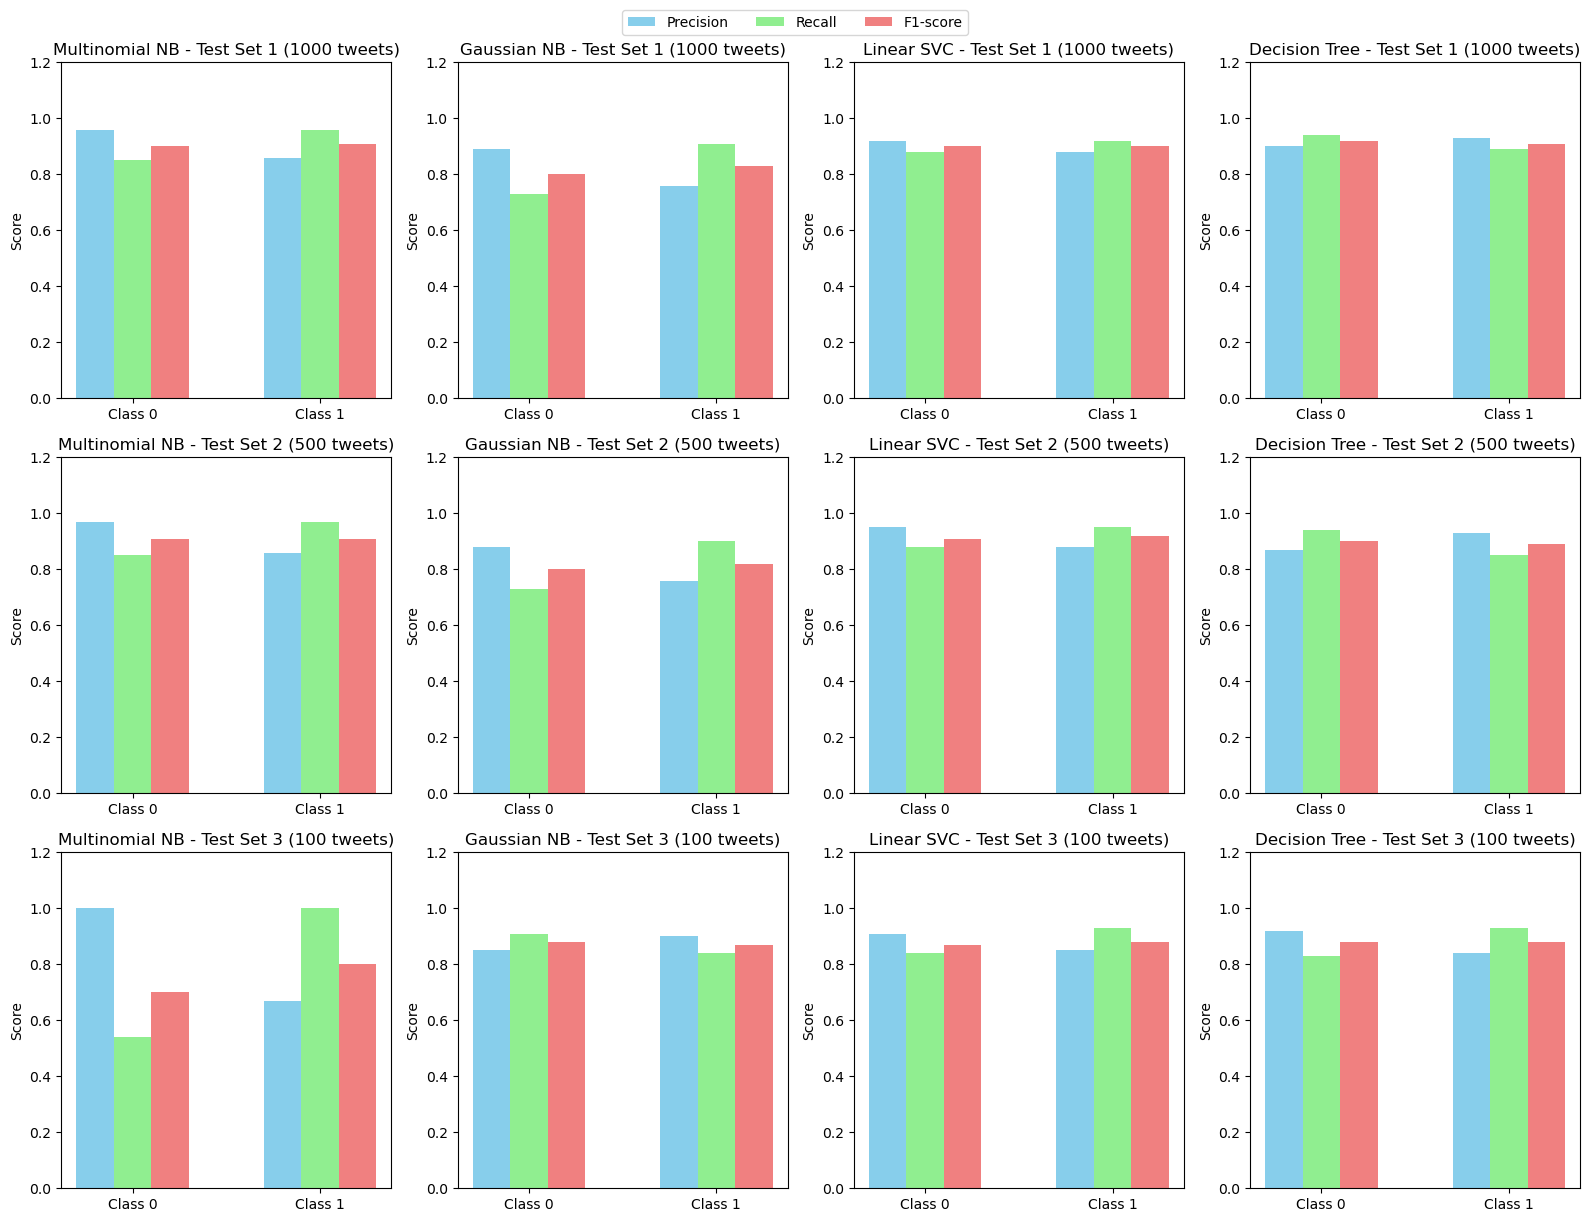

In [83]:
import matplotlib.pyplot as plt
import numpy as np

# Define the classifiers and their corresponding labels
classifiers = ['Multinomial NB', 'Gaussian NB', 'Linear SVC', 'Decision Tree']

# Define the test set labels with the number of tweets
test_sets = ['Test Set 1 (1000 tweets)', 'Test Set 2 (500 tweets)', 'Test Set 3 (100 tweets)']

# Precision values for each classifier and test set
precision_values = [
    [[0.96, 0.86], [0.97, 0.86], [1.00, 0.67]],
    [[0.89, 0.76], [0.88, 0.76], [0.85, 0.90]],
    [[0.92, 0.88], [0.95, 0.88], [0.91, 0.85]],
    [[0.90, 0.93], [0.87, 0.93], [0.92, 0.84]]
]

# Recall values for each classifier and test set
recall_values = [
    [[0.85, 0.96], [0.85, 0.97], [0.54, 1.00]],
    [[0.73, 0.91], [0.73, 0.90], [0.91, 0.84]],
    [[0.88, 0.92], [0.88, 0.95], [0.84, 0.93]],
    [[0.94, 0.89], [0.94, 0.85], [0.83, 0.93]]
]

# F1-score values for each classifier and test set
f1_score_values = [
    [[0.90, 0.91], [0.91, 0.91], [0.70, 0.80]],
    [[0.80, 0.83], [0.80, 0.82], [0.88, 0.87]],
    [[0.90, 0.90], [0.91, 0.92], [0.87, 0.88]],
    [[0.92, 0.91], [0.90, 0.89], [0.88, 0.88]]
]

# Plotting precision, recall, and F1-score for each class and test set
fig, axs = plt.subplots(3, 4, figsize=(16, 12))

bar_width = 0.2
index = np.arange(2)

for i in range(4):
    for j in range(3):
        # Plot bars for precision, recall, and F1-score
        axs[j, i].bar(index - bar_width, precision_values[i][j], width=bar_width, color='skyblue', label='Precision')
        axs[j, i].bar(index, recall_values[i][j], width=bar_width, color='lightgreen', label='Recall')
        axs[j, i].bar(index + bar_width, f1_score_values[i][j], width=bar_width, color='lightcoral', label='F1-score')
        
        axs[j, i].set_title(f'{classifiers[i]} - {test_sets[j]}')
        axs[j, i].set_ylim(0, 1.2)
        axs[j, i].set_xticks(index)
        axs[j, i].set_xticklabels(['Class 0', 'Class 1'])
        axs[j, i].set_ylabel('Score')

# Create a single legend outside the subplots
handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.02), ncol=3)

plt.tight_layout()
plt.show()


In [49]:
#PREDICTION CODE

In [9]:
nltk.download('stopwords')
nltk.download('wordnet')

def cleanText(tweet):
    # Replaces URLs with a special token
    tweet = re.sub(r'((www.\S+)|(https?://\S+))', '<URL>', tweet)
    # Removes the numbers from the text
    tweet = re.sub(r'[0-9]\S+', r'', tweet)
    # Removes tags from tweets except for hashtags
    tweet = re.sub(r'(@\S+)', r'', tweet)
    # Removes the punctuation from the text except for #
    tweet_without_punctuation = re.sub(r'[^#\w\s]', r'', tweet)
    # Sets stop words
    stop_words = set(stopwords.words("english"))
    # Removes the stop words from tweet
    tweet_without_stopwords = [word for word in tweet_without_punctuation.split() if word.lower() not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in tweet_without_stopwords]
    # Join the list of cleaned words into a single string
    cleaned_tweet = ' '.join(lemmatized_words)
    return cleaned_tweet

def predict_tweet_classification(tweet, cv, MultinomialNB, GaussianNB, LinearSVC, DecisionTreeClassifier):
    # Preprocess the tweet
    cleaned_tweet = cleanText(tweet)
    # Vectorize the preprocessed tweet
    tweet_vectorized = cv.transform([cleaned_tweet])
    # Predict the classification using the trained models
    MNB_predicted_class = MultinomialNB.predict(tweet_vectorized)
    GNB_predicted_class = GaussianNB.predict(tweet_vectorized.toarray())
    SVM_predicted_class = LinearSVC.predict(tweet_vectorized)
    DT_predicted_class = DecisionTreeClassifier.predict(tweet_vectorized)
    
    # Create a dictionary containing all predicted classes
    predictions = {
        "MultinomialNB": MNB_predicted_class[0],
        "GaussianNB": GNB_predicted_class[0],
        "LinearSVC": SVM_predicted_class[0],
        "DecisionTreeClassifier": DT_predicted_class[0]
    }
    
    # Print the dictionary containing all predicted classes
    print(predictions)
    
    # Return the dictionary
    return predictions

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/joeyholzman/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/joeyholzman/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [10]:
# Example usage
tweet = "#test tweet"
# Assuming cv, MultinomialNB, GaussianNB, LinearSVC, and DecisionTreeClassifier are already initialized and trained
predicted_classes = predict_tweet_classification(tweet, cv, MultinomialNB, GaussianNB, LinearSVC, DecisionTreeClassifier)

{'MultinomialNB': 0, 'GaussianNB': 0, 'LinearSVC': 0, 'DecisionTreeClassifier': 0}


In [11]:
# Load the Predict_Tweets.json file
with open('./Tweet_Datasets/Predict_Tweets.json', 'r') as file:
    data = json.load(file)

# Initialize lists to store classifications
MNB_classifications = []
GaussianNB_classifications = []
SVC_classifications = []
DT_classifications = []

# Iterate through each entry in the data
for entry in data:
    tweet_text = entry["TweetText"]
    
    # Predict classifications for the current tweet using the trained models
    MNB_classification = MultinomialNB.predict(cv.transform([tweet_text]))[0]
    GaussianNB_classification = GaussianNB.predict(cv.transform([tweet_text]).toarray())[0]
    SVC_classification = LinearSVC.predict(cv.transform([tweet_text]))[0]
    DT_classification = DecisionTreeClassifier.predict(cv.transform([tweet_text]))[0]
    
    # Append the classifications to the corresponding lists
    MNB_classifications.append(MNB_classification)
    GaussianNB_classifications.append(GaussianNB_classification)
    SVC_classifications.append(SVC_classification)
    DT_classifications.append(DT_classification)

# Add the new classification labels to the original data
for i, entry in enumerate(data):
    entry["MNBClassification"] = MNB_classifications[i]
    entry["GaussianNBClassification"] = GaussianNB_classifications[i]
    entry["SVCClassification"] = SVC_classifications[i]
    entry["DTClassification"] = DT_classifications[i]

# Convert the updated data to DataFrame
df = pd.DataFrame(data)

# Write the updated DataFrame back to Predict_Tweets.json
df.to_json('./Tweet_Datasets/Predict_Tweets.json', orient='records', indent=4)

In [18]:
import json

# Read the data from the original JSON file
with open('./Tweet_Datasets/Predict_Tweets.json', 'r') as file:
    data = json.load(file)

# Function to append entries with "1" classification and their "TokenizedTweet" values to respective JSON files
def append_tokenized_tweets(classification, data, filename):
    entries = [entry["TokenizedTweet"] for entry in data if entry[classification] == 1 and "TokenizedTweet" in entry]
    
    # Write the entries to the file
    with open(filename, 'w') as outfile:
        # Write the opening bracket to start the array
        outfile.write("[\n")
        
        # Write each entry (TokenizedTweet) as a JSON object
        for i, tokenized_tweet in enumerate(entries):
            if i > 0:
                outfile.write(",\n")  # Add comma before each entry (except the first one)
            json.dump({"TokenizedTweet": tokenized_tweet}, outfile)
        
        # Write the closing bracket to end the array
        outfile.write("\n]")

# Append entries with "1" classification and their "TokenizedTweet" values for each classifier to respective JSON files
append_tokenized_tweets("MNBClassification", data, './Tweet_Datasets/Trained_Tweets/MNB_Classifications.json')
append_tokenized_tweets("GaussianNBClassification", data, './Tweet_Datasets/Trained_Tweets/GaussianNB_Classifications.json')
append_tokenized_tweets("SVCClassification", data, './Tweet_Datasets/Trained_Tweets/SVC_Classifications.json')
append_tokenized_tweets("DTClassification", data, './Tweet_Datasets/Trained_Tweets/DT_Classifications.json')



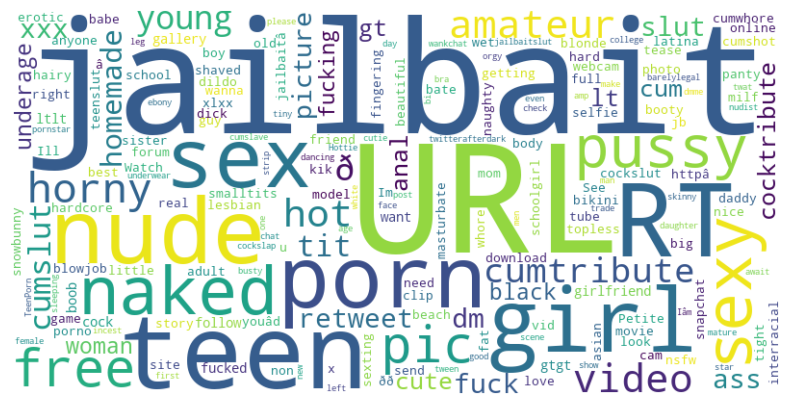

In [81]:
import json
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_token_wordcloud(json_file):
    # Initialize an empty string to store all tokens
    all_tokens = ''
    
    # Read the JSON file line by line
    with open(json_file, 'r') as file:
        # Load JSON data from the file
        data = json.load(file)
        
        # Iterate through each entry and extract tokens
        for entry in data:
            if "TokenizedTweet" in entry:
                tokenized_tweet = entry["TokenizedTweet"]
                all_tokens += ' '.join(tokenized_tweet) + ' '

    return all_tokens

# Generate word clouds for each JSON file
mnb_tokens = generate_token_wordcloud('./Tweet_Datasets/Trained_Tweets/MNB_Classifications.json')
gnb_tokens = generate_token_wordcloud('./Tweet_Datasets/Trained_Tweets/GaussianNB_Classifications.json')
svc_tokens = generate_token_wordcloud('./Tweet_Datasets/Trained_Tweets/SVC_Classifications.json')
dt_tokens = generate_token_wordcloud('./Tweet_Datasets/Trained_Tweets/DT_Classifications.json')

# Combine tokens from all JSON files without repeats
combined_tokens = ' '.join([mnb_tokens, gnb_tokens, svc_tokens, dt_tokens])

# Generate word cloud for the combined tokens
wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(combined_tokens)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


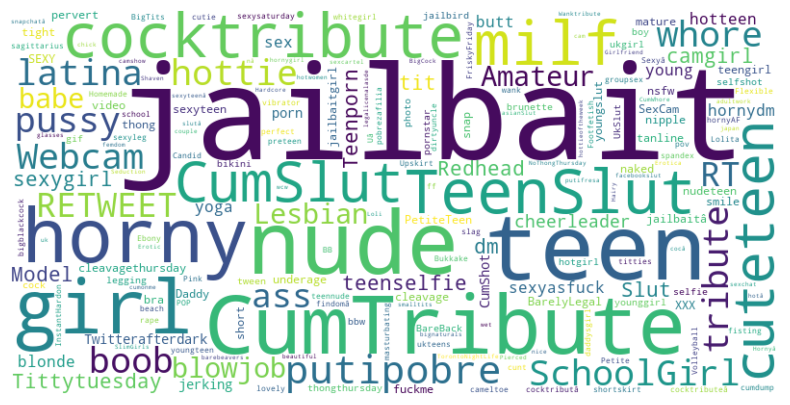

Unique Hashtags in MNB Word Cloud: ['#ukteens', '#whitegirl', '#gujarati', '#getting', '#african', '#pens', '#teendick', '#she', '#Ù', '#cocktribuâ', '#supergirl', '#Volleyball', '#cumart', '#linda', '#cameltoe', '#jimi', '#readhead', '#Putiselfies', '#jenifer', '#nud', '#cocktribute#nude', '#chris', '#SluttyJenna', '#kcfm', '#daddysgirl', '#iranian', '#triple', '#nationalsendajailbaitday', '#Lolita', '#Bukkake', '#younh', '#ladieswhereyouat', '#SummerBabes', '#pimpimtamvan', '#sisman', '#suck', '#camporn', '#baked', '#cocktributeâ', '#bangs', '#amatuercutie', '#cutie', '#StoneColdRussia', '#devon', '#baluchistan', '#lewd', '#interracial', '#hawt', '#thick', '#IdCumOnHer', '#topeka', '#hair', '#bumhole', '#indianpornvideo', '#sarah', '#nakeâ', '#TorontoClubs', '#TEAMBAMBIBLACKS', '#fuckable', '#cassandra', '#mary', '#old', '#ÑÐµÐºÑ', '#masturbateâ', '#twitterclarets', '#rape', '#mommysgirl', '#teenbody', '#spandex', '#teennude', '#smaltits', '#amputee', '#fantasy', '#femaile', '#jailba

In [82]:
import json
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_unique_hashtag_wordcloud(json_file):
    # Initialize an empty set to store unique hashtags
    unique_hashtags = set()
    
    # Read the JSON file line by line
    with open(json_file, 'r') as file:
        # Load JSON data from the file
        data = json.load(file)
        
        # Iterate through each entry and extract hashtags
        for entry in data:
            if "TokenizedTweet" in entry:
                tokenized_tweet = entry["TokenizedTweet"]
                # Extract hashtags and add them to the set
                unique_hashtags.update([word for word in tokenized_tweet if word.startswith('#')])

    # Return list of unique hashtags
    return list(unique_hashtags)

# Generate word clouds and get unique hashtags for each JSON file
hashtags_mnb = generate_unique_hashtag_wordcloud('./Tweet_Datasets/Trained_Tweets/MNB_Classifications.json')
hashtags_gaussian = generate_unique_hashtag_wordcloud('./Tweet_Datasets/Trained_Tweets/GaussianNB_Classifications.json')
hashtags_svc = generate_unique_hashtag_wordcloud('./Tweet_Datasets/Trained_Tweets/SVC_Classifications.json')
hashtags_dt = generate_unique_hashtag_wordcloud('./Tweet_Datasets/Trained_Tweets/DT_Classifications.json')

# Combine hashtags from all JSON files without repeats
combined_hashtags = hashtags_mnb + hashtags_gaussian + hashtags_svc + hashtags_dt
combined_hashtags_set = set(combined_hashtags)
combined_hashtags_list = list(combined_hashtags_set)
combined_hashtags_str = ' '.join(combined_hashtags_list)

# Generate word cloud for the combined hashtags
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_hashtags_str)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Display the lists of unique hashtags for each word cloud
print("Unique Hashtags in MNB Word Cloud:", hashtags_mnb)
print("Unique Hashtags in GaussianNB Word Cloud:", hashtags_gaussian)
print("Unique Hashtags in SVC Word Cloud:", hashtags_svc)
print("Unique Hashtags in DT Word Cloud:", hashtags_dt)




In [34]:
# Chi-Squared Test for Independence
def chi_squared_test(hashtags1, hashtags2):
    # Create frequency tables
    freq_table = [[hashtags1.count(word), hashtags2.count(word)] for word in set(hashtags1 + hashtags2)]
    
    # Perform chi-squared test
    chi2, p, _, _ = chi2_contingency(freq_table)
    return chi2, p

# Perform chi-squared test for each pair of word clouds
chi2_mnb_gaussian, p_mnb_gaussian = chi_squared_test(hashtags_mnb, hashtags_gaussian)
chi2_mnb_svc, p_mnb_svc = chi_squared_test(hashtags_mnb, hashtags_svc)
chi2_mnb_dt, p_mnb_dt = chi_squared_test(hashtags_mnb, hashtags_dt)

chi2_gaussian_svc, p_gaussian_svc = chi_squared_test(hashtags_gaussian, hashtags_svc)
chi2_gaussian_dt, p_gaussian_dt = chi_squared_test(hashtags_gaussian, hashtags_dt)

chi2_svc_dt, p_svc_dt = chi_squared_test(hashtags_svc, hashtags_dt)

print("Chi-Squared Test Results:")
print("MNB vs. GaussianNB: Chi2 =", chi2_mnb_gaussian, "p =", p_mnb_gaussian)
print("MNB vs. SVC: Chi2 =", chi2_mnb_svc, "p =", p_mnb_svc)
print("MNB vs. DT: Chi2 =", chi2_mnb_dt, "p =", p_mnb_dt)
print("GaussianNB vs. SVC: Chi2 =", chi2_gaussian_svc, "p =", p_gaussian_svc)
print("GaussianNB vs. DT: Chi2 =", chi2_gaussian_dt, "p =", p_gaussian_dt)
print("SVC vs. DT: Chi2 =", chi2_svc_dt, "p =", p_svc_dt)

# Frequency Comparison
def frequency_comparison(hashtags1, hashtags2):
    # Calculate mean frequencies
    mean_freq1 = np.mean([hashtags1.count(word) for word in set(hashtags1)])
    mean_freq2 = np.mean([hashtags2.count(word) for word in set(hashtags2)])
    return mean_freq1, mean_freq2

# Perform frequency comparison for each pair of word clouds
mean_freq_mnb, mean_freq_gaussian = frequency_comparison(hashtags_mnb, hashtags_gaussian)
mean_freq_mnb_svc, mean_freq_svc = frequency_comparison(hashtags_mnb, hashtags_svc)
mean_freq_mnb_dt, mean_freq_dt = frequency_comparison(hashtags_mnb, hashtags_dt)

mean_freq_gaussian_svc, _ = frequency_comparison(hashtags_gaussian, hashtags_svc)
mean_freq_gaussian_dt, _ = frequency_comparison(hashtags_gaussian, hashtags_dt)

mean_freq_svc_dt, _ = frequency_comparison(hashtags_svc, hashtags_dt)

print("\nFrequency Comparison Results:")
print("MNB Mean Frequency =", mean_freq_mnb)
print("GaussianNB Mean Frequency =", mean_freq_gaussian)
print("MNB Mean Frequency =", mean_freq_mnb)
print("SVC Mean Frequency =", mean_freq_svc)
print("MNB Mean Frequency =", mean_freq_mnb)
print("DT Mean Frequency =", mean_freq_dt)

print("GaussianNB Mean Frequency =", mean_freq_gaussian)
print("SVC Mean Frequency =", mean_freq_svc)
print("DT Mean Frequency =", mean_freq_dt)

print("SVC Mean Frequency =", mean_freq_svc)
print("DT Mean Frequency =", mean_freq_dt)

# Correlation Analysis
def correlation_analysis(hashtags1, hashtags2):
    # Calculate Pearson correlation coefficient
    correlation_coef, _ = pearsonr([hashtags1.count(word) for word in set(hashtags1)],
                                   [hashtags2.count(word) for word in set(hashtags2)])
    return correlation_coef

# Perform correlation analysis for each pair of word clouds
corr_coef_mnb_gaussian = correlation_analysis(hashtags_mnb, hashtags_gaussian)
corr_coef_mnb_svc = correlation_analysis(hashtags_mnb, hashtags_svc)
corr_coef_mnb_dt = correlation_analysis(hashtags_mnb, hashtags_dt)

corr_coef_gaussian_svc = correlation_analysis(hashtags_gaussian, hashtags_svc)
corr_coef_gaussian_dt = correlation_analysis(hashtags_gaussian, hashtags_dt)

corr_coef_svc_dt = correlation_analysis(hashtags_svc, hashtags_dt)

print("\nCorrelation Analysis Results:")
print("MNB vs. GaussianNB Correlation Coefficient =", corr_coef_mnb_gaussian)
print("MNB vs. SVC Correlation Coefficient =", corr_coef_mnb_svc)
print("MNB vs. DT Correlation Coefficient =", corr_coef_mnb_dt)
print("GaussianNB vs. SVC Correlation Coefficient =", corr_coef_gaussian_svc)
print("GaussianNB vs. DT Correlation Coefficient =", corr_coef_gaussian_dt)
print("SVC vs. DT Correlation Coefficient =", corr_coef_svc_dt)

Chi-Squared Test Results:
MNB vs. GaussianNB: Chi2 = 576.0628655990579 p = 1.0
MNB vs. SVC: Chi2 = 1416.7176509895592 p = 1.0
MNB vs. DT: Chi2 = 1598.7226173310198 p = 1.0
GaussianNB vs. SVC: Chi2 = 1685.6359206848836 p = 1.0
GaussianNB vs. DT: Chi2 = 1846.025547995277 p = 1.0
SVC vs. DT: Chi2 = 996.2875441691724 p = 1.0

Frequency Comparison Results:
MNB Mean Frequency = 1.0
GaussianNB Mean Frequency = 1.0
MNB Mean Frequency = 1.0
SVC Mean Frequency = 1.0
MNB Mean Frequency = 1.0
DT Mean Frequency = 1.0
GaussianNB Mean Frequency = 1.0
SVC Mean Frequency = 1.0
DT Mean Frequency = 1.0
SVC Mean Frequency = 1.0
DT Mean Frequency = 1.0


ValueError: x and y must have the same length.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import json

# Load the classified tweets data
with open('./Tweet_Datasets/Classified_Tweets/Classified_Tweets.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

# Extract TokenizedTweet values
tokenized_tweets = [entry["TokenizedTweet"] for entry in data]

# Create a list of tweets with only the identified key tokens and hashtags
tokenized_tweets_filtered = [filter_tokens(tweet, key_tokens_and_hashtags) for tweet in tokenized_tweets]

# Convert the filtered tokenized tweets to strings
filtered_tweets_str = [' '.join(tweet) for tweet in tokenized_tweets_filtered]

# Create a new CountVectorizer with the updated tokenized data
cv = CountVectorizer(max_features=3000)
X_new = cv.fit_transform(filtered_tweets_str).toarray()

# Retrain the models using the new BOW matrix as features
MultinomialNB_retrained.fit(X_new, y_train_1000)
GaussianNB_retrained.fit(X_new, y_train_1000)
LinearSVC_retrained.fit(X_new, y_train_1000)
DecisionTreeClassifier_retrained.fit(X_new, y_train_1000)

# Evaluate the performance of the retrained models
# (You may need to split your data into training and testing sets again)
